In [1]:
from FirstModelOOP import FirstModel
from brian2 import*
import functions
from IPython.display import Video, Image
from opencvtry import cvWriter
import parameter_tuning

%load_ext autoreload
%autoreload 2


## Create, Run and Plot
Create the Model.
Run the model for 100 ms.
Plot the voltages of some cells.

## Create the trajectory
With a paint app, we draw the trajectory we want.
First we draw a trajectory by using the "paintapp.py".

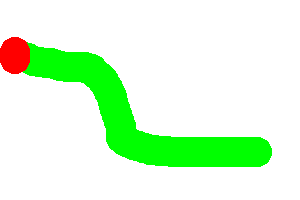

In [2]:
Image(filename="new_trajectory.png")

In [3]:
num_tonic_neurons = 20
num_ext_neurons = 10


connection_matrix_G = np.load('G_inputs.npy')
connection_matrix_G = 255 * np.ones(connection_matrix_G.shape) - connection_matrix_G
if not np.any(connection_matrix_G==0):
    result_G = functions.convert_matrix_pos_to_indices(num_ext_neurons, connection_matrix_G, rows=20, cols=30)
else:
    result_G = None

connection_matrix_S = np.load('S_inputs.npy')
connection_matrix_S = 255 * np.ones(connection_matrix_S.shape) - connection_matrix_S
result_S = functions.convert_matrix_pos_to_indices(num_ext_neurons, connection_matrix_S, rows=20, cols=30)


In [4]:
def plot_run(params, my_duration=100):
    start_scope()
    
    
    
    fm1 = FirstModel(params)
    
    fm1.run(duration= my_duration * ms, show_PC=True, show_other=False)
    
    functions.plot_spike_times(fm1,0, plot_distribution=False)

    #functions.plot_spike_times(fm1, 1, plot_distribution=False)
    
    element = {      
          'rec_weight' : 5.,
          'ext_weight' : 0.5,
          'R_weight' : 0.5,
          'inh_weight_pi' : 0.1,
          'inh_weight_ip' : 0.01,
          'variance_spike_times' : fm1.variance_spike_times,
          'mean_spike_times' : fm1.mean_spike_times,
          'number_spiking_cells' : fm1.number_spiking_cells,
          'number_spiking_outside_trajectory' : fm1.number_spiking_outside_trajectory,
          'variance_spikes_trajectory' : fm1.variance_spikes_trajectory,
          'mean_spikes_trajectory' : fm1.mean_spikes_trajectory
        
         }
    
    return fm1, element
    



##### Exploration of parameters
Explore parameters to find some appropriate one. 

In [5]:
fm1 = None

params = { 'Model' : 'Threshold_plasiticity', # options : 'Fairhall' or 'Threshold_plasiticity'
         'connection_matrix_S' : result_S,
          'num_tonic_neurons' : num_tonic_neurons,
          'num_ext_neurons' : num_ext_neurons,
          
          'rec_weight' : 5.,
          'ext_weight' : 0.5,
          'R_weight' : 0.5,
          'inh_weight_pi' : 0.1,
           'inh_weight_ip' : 0.01
         }

if not result_G is None:
    params['connection_matrix_G'] = result_G
    
list_params = [params]

In [6]:
list_params = [params]
for i in range(2):
    rec_weight = 2. + i*0.5
    for j in range(1):
        ext_weight = 0.5 + j*0.1
        R_weight = 0.4
        inh_weight_pi = 0.1

        new_param = functions.add_params(params, rec_weight=rec_weight, ext_weight=ext_weight,
                                R_weight=R_weight, inh_weight_pi=inh_weight_pi)
        list_params.append(new_param)

rec_weight + ext_weight + R_weight + inh_weight_pi + inh_weight_ip
2.0 0.5 0.4 0.1 0.01
rec_weight + ext_weight + R_weight + inh_weight_pi + inh_weight_ip
2.5 0.5 0.4 0.1 0.01


rec_weight + ext_weight + R_weight + inh_weight_pi + inh_weight_ip
5.0 0.5 0.5 0.1 0.01


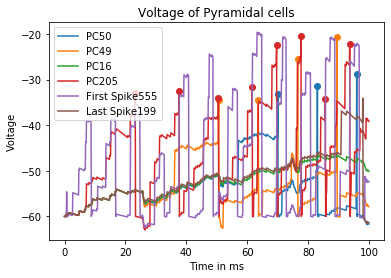

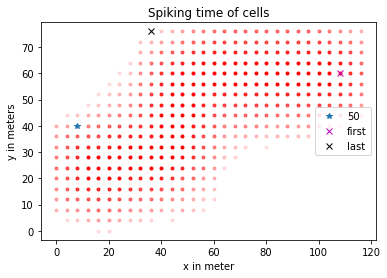

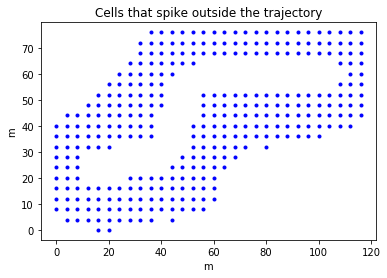

rec_weight + ext_weight + R_weight + inh_weight_pi + inh_weight_ip
2.0 0.5 0.4 0.1 0.01


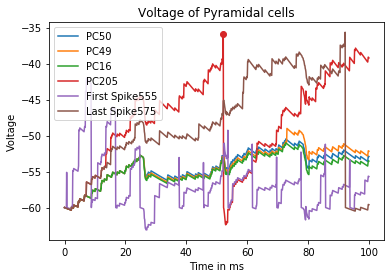

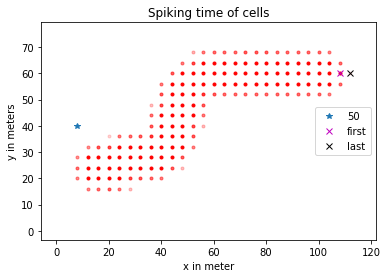

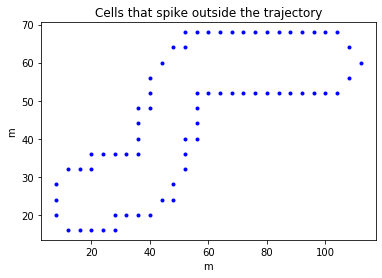

rec_weight + ext_weight + R_weight + inh_weight_pi + inh_weight_ip
2.5 0.5 0.4 0.1 0.01


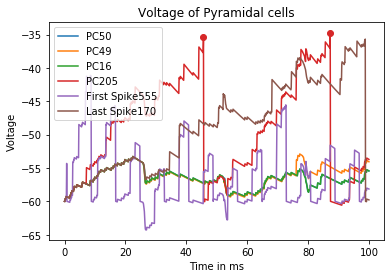

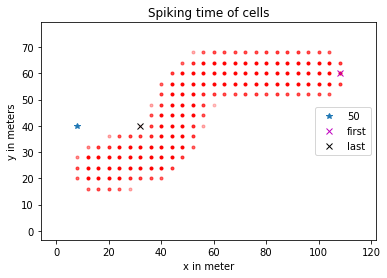

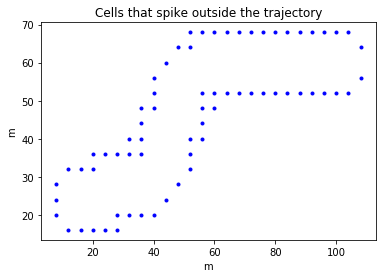

In [9]:
other_list = []
for p in list_params:
    print('rec_weight + ext_weight + R_weight + inh_weight_pi + inh_weight_ip')
    print(p['rec_weight'], p['ext_weight'], p['R_weight'], p['inh_weight_pi'], p['inh_weight_ip'])
    fm1, element = plot_run(p)
    other_list.append(element)
    
parameter_tuning.parameter_tuning(other_list)


## Spike time plots
Plot distribution of spiking times.
And visualise spiking times of the place cells.
(Way faster than creating a video).

## Plasticity
The spiking threshold changes according to if it spiked before.

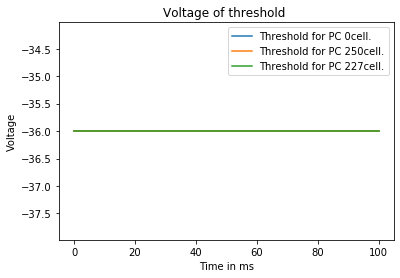

In [10]:
functions.plot_voltages_other_types(fm1,['threshold'], [0,250, 227])

In [7]:
list_frames, height, width = functions.video_spike_times(fm1, spiking_index=1)

In [9]:
functions.convert_to_movie(list_frames, 116, 76, "videospikes1.mp4")
width = 30 * fm1.p['rows']
height = 30 * fm1.p['cols']


Video.reload("videospikes1.mp4")

Video("videospikes1.mp4", width = width, height = height)

In [ ]:
functions.plot_voltages_other_types(fm1,['INH'], [0])
functions.plot_voltages_other_types(fm1,['G'], [0])

## Structure of the network
Plot the connectivity of the cells:
- Reccurrent connectivity
- G inputs, tonic input along the trajectory
- S inputs, external triggering

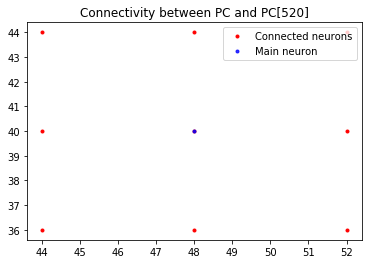

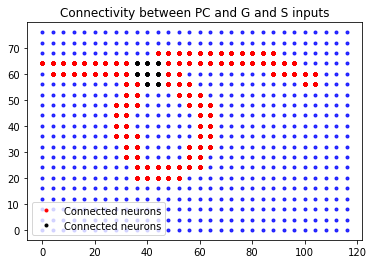

In [94]:
functions.plot_connectivity(fm1, [fm1.SPC], "PC[" +str(520)+ "]" , 250)
show()


functions.plot_connectivity(fm1, [fm1.SPCG], "G inputs")
show()

## Distribution of parameters
Plot distribtution of certain parameters:
- Weight parameters
- Delay parameters

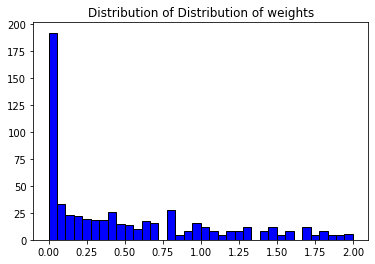

In [17]:
n = fm1.p['rows'] * fm1.p['cols']
list_ = []
for i in range(n):
    list_.append(2*exp(-((fm1.PC.x[150]-fm1.PC.x[i])**2+(fm1.PC.y[150] - fm1.PC.y[i])**2)/(30*metre)**2))

functions.plot_distrib(list_, "Distribution of weights")

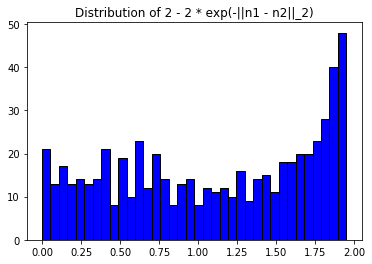

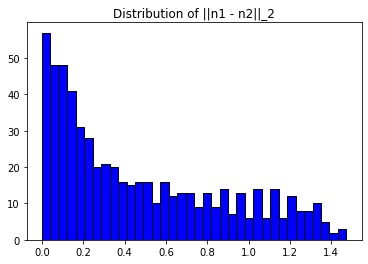

In [18]:
functions.plot_different_distances(fm1)

## Visualise distances
Norm l2 distance.

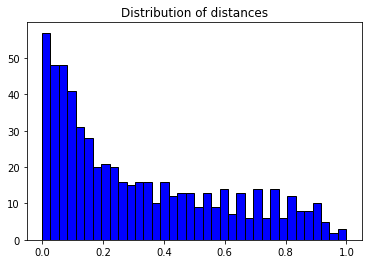

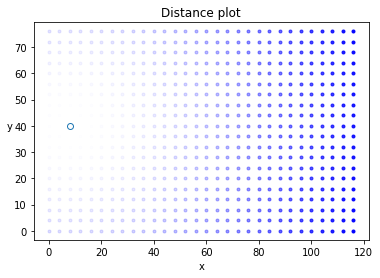

In [207]:
neuron_idx = 50
functions.plot_distance(fm1)

## Visualise connectivity between cells.
Disclaimer: takes a lot of time to run.

## Parameter exploration
Can explore the different parameters and their consequences.

In [ ]:
for i in range(3):
    print('For model ',i)
    start_scope()
    p = {
            # Tonic Neurons
            "v_reset_tonic" : -80 + i*30,        # Leak potential
            "v_leak_tonic" : -80,         # Reset potential
            "v_thr_tonic" : -50,          # Spiking threshold
            'tau_dyn_tonic': 5 * ms,      # Leak timescale
            "tau_refr_tonic" : 2 * ms,    # Refractory period
            "gi_tonic" : 1,               # ???

            # External Input Neurons
            "v_reset_ext": -80 + i*30,  # Leak potential
            "v_leak_ext": -80,  # Reset potential
            "v_thr_ext": -50,  # Spiking threshold
            'tau_dyn_ext': 5 * ms,  # Leak timescale
            "tau_refr_ext": 2 * ms,  # Refractory period
            "gi_ext": 1,  # ???
    }
    fm1 = FirstModel(p)
    fm1.run(show_other=True)